## 01. Menyertakan Prefix dan Suffix pada seluruh Kolom Pandas Data Frame 

###### Import Modules

In [1]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.3.3
1.21.2


##### Persiapan Data Frame

In [2]:
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 10, size = (n_rows, n_cols)),
                 columns = cols)
df

,A,B,C,D,E
0,2,8,4,9,3
1,7,1,2,2,8
2,8,5,1,8,6
3,4,3,8,1,7
4,6,4,5,8,4


In [3]:
tuple('ABCDE') 
# membentuk tuple yang terdiri dari karakter string

('A', 'B', 'C', 'D', 'E')

##### Menyertakan Prefix Kolom

In [5]:
df.add_prefix('kolom ')

,kolom A,kolom B,kolom C,kolom D,kolom E
0,2,8,4,9,3
1,7,1,2,2,8
2,8,5,1,8,6
3,4,3,8,1,7
4,6,4,5,8,4


##### Menyertakan Suffix Kolom

In [6]:
df.add_suffix('_field')

,A_field,B_field,C_field,D_field,E_field
0,2,8,4,9,3
1,7,1,2,2,8
2,8,5,1,8,6
3,4,3,8,1,7
4,6,4,5,8,4


## 02. Pemilihan baris (rows selection) pada Data Frame

##### Persiapan Data Frame

In [7]:
# import module dulu
n_rows = 10
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 5, size = (n_rows, n_cols)),
                 columns = cols)
df

,A,B,C,D,E
0,3,2,2,3,1
1,4,4,4,3,2
2,3,2,1,3,1
3,1,2,1,3,4
4,1,4,4,3,2
5,4,2,2,3,3
6,4,3,2,2,4
7,1,2,4,1,4
8,4,3,1,2,1
9,3,2,2,2,1


##### Selection dengan operator logika **|**
artinya "atau"

In [8]:
df[(df['A'] == 1) | (df['A'] == 3)]

,A,B,C,D,E
0,3,2,2,3,1
2,3,2,1,3,1
3,1,2,1,3,4
4,1,4,4,3,2
7,1,2,4,1,4
9,3,2,2,2,1


##### Selection dengan fungsi `isin()`
pengganti operator |

In [10]:
df[df['A'].isin([1, 3])]

,A,B,C,D,E
0,3,2,2,3,1
2,3,2,1,3,1
3,1,2,1,3,4
4,1,4,4,3,2
7,1,2,4,1,4
9,3,2,2,2,1


##### Mengenal operator negasi **`~`**

In [11]:
df[~df['A'].isin([1, 3])]

,A,B,C,D,E
1,4,4,4,3,2
5,4,2,2,3,3
6,4,3,2,2,4
8,4,3,1,2,1


## 03. Konversi tipe data String ke Numerik pada kolom Data Frame

##### Persiapan Data Frame

In [12]:
data = {'col1' : ['1', '2', '3', 'teks'],
        'col2' : ['1', '2', '3','4']}

df = pd.DataFrame(data)
df

,col1,col2
0,1,1
1,2,2
2,3,3
3,teks,4


In [15]:
df.dtypes # tipe data setiap kolom
# string -> object

col1    object
col2    object
dtype: object

##### Konversi tipe data dengan fungsi `astype()`

In [18]:
# mengubah tipe data menjadi integer
df_x = df.astype({'col2' : 'int'})
df_x

,col1,col2
0,1,1
1,2,2
2,3,3
3,teks,4


In [17]:
df_x.dtypes

col1    object
col2     int32
dtype: object

##### Konversi tipe data numerk dengan fungsi `to_numerik()`
untuk seluruh kolom

In [22]:
df.apply(pd.to_numeric, errors = 'coerce')
# coerce : jika terdapat data yg tidak dapat dikonversi maka dianggap missing values

,col1,col2
0,1.0,1
1,2.0,2
2,3.0,3
3,NaN,4


## 04. Pemilihan kolom (colomns selection) pada Pandas Data Frame berdasarkan tipe data

##### Persiapan Data Frame

In [9]:
# import module dulu
n_rows = 5
n_cols = 2
cols = ['bil_pecahan','bil_bulat']

df = pd.DataFrame(np.random.randint(1, 20, size = (n_rows, n_cols)),
                 columns = cols)
df['bil_pecahan'] = df['bil_pecahan'].astype('float')

# indeks digenerate dg tipe data date time
# H : interval setiap jam
df.index = pd.util.testing.makeDateIndex(n_rows, freq = 'H')
df = df.reset_index()

df['teks'] = list('ABCDE')

df

,index,bil_pecahan,bil_bulat,teks
0,2000-01-01 00:00:00,1.0,2,A
1,2000-01-01 01:00:00,6.0,15,B
2,2000-01-01 02:00:00,1.0,17,C
3,2000-01-01 03:00:00,9.0,5,D
4,2000-01-01 04:00:00,5.0,9,E


In [11]:
df.dtypes

index          datetime64[ns]
bil_pecahan           float64
bil_bulat               int32
teks                   object
dtype: object

##### Memilih kolom bertipe data numerik

In [13]:
df.select_dtypes(include = 'number')

,bil_pecahan,bil_bulat
0,1.0,2
1,6.0,15
2,1.0,17
3,9.0,5
4,5.0,9


In [15]:
# jika ingin lebih spesifik
df.select_dtypes(include = 'float')

,bil_pecahan
0,1.0
1,6.0
2,1.0
3,9.0
4,5.0


In [14]:
df.select_dtypes(include = 'int')

,bil_bulat
0,2
1,15
2,17
3,5
4,9


##### Memilih kolom bertipe data string atau ` object`

In [16]:
df.select_dtypes(include = 'object')

,teks
0,A
1,B
2,C
3,D
4,E


##### Memilih kolom bertipe data `datetime`

In [17]:
df.select_dtypes(include = 'datetime')

,index
0,2000-01-01 00:00:00
1,2000-01-01 01:00:00
2,2000-01-01 02:00:00
3,2000-01-01 03:00:00
4,2000-01-01 04:00:00


##### Memilih kolom dengan kombinasi tipe data

In [18]:
df.select_dtypes(include = ['number','object'])

,bil_pecahan,bil_bulat,teks
0,1.0,2,A
1,6.0,15,B
2,1.0,17,C
3,9.0,5,D
4,5.0,9,E


## 05. Membalik urutan baris dan kolom pada Data Frame

In [19]:
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 10, size = (n_rows, n_cols)),
                 columns = cols)
df

,A,B,C,D,E
0,8,8,4,2,9
1,2,7,4,6,6
2,4,9,3,6,2
3,4,9,3,9,6
4,1,5,9,4,6


##### Membalik urutan kolom

In [20]:
df.loc[:, ::-1]

,E,D,C,B,A
0,9,2,4,8,8
1,6,6,4,7,2
2,2,6,3,9,4
3,6,9,3,9,4
4,6,4,9,5,1


##### Membalik urutan baris

In [21]:
df.loc[::-1]

,A,B,C,D,E
4,1,5,9,4,6
3,4,9,3,9,6
2,4,9,3,6,2
1,2,7,4,6,6
0,8,8,4,2,9


##### Membalik urutan baris dan melakukank penyesuaian ulang `index`

In [22]:
df.loc[::-1].reset_index(drop = True)

,A,B,C,D,E
0,1,5,9,4,6
1,4,9,3,9,6
2,4,9,3,6,2
3,2,7,4,6,6
4,8,8,4,2,9


## 06. Mengganti nama kolom pada Data Frame

In [23]:
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 10, size = (n_rows, n_cols)),
                 columns = cols)
df

,A,B,C,D,E
0,5,4,2,3,4
1,5,4,6,1,8
2,6,3,2,3,5
3,8,3,2,2,3
4,3,3,1,8,1


##### Mengganti nama (label) kolom pada Data Frame

In [24]:
df.rename(columns = {'C': 'Hobi'})

,A,B,Hobi,D,E
0,5,4,2,3,4
1,5,4,6,1,8
2,6,3,2,3,5
3,8,3,2,2,3
4,3,3,1,8,1


In [25]:
df.rename(columns = {'A': 'Nama', 'B': 'Alamat', 'D': 'Kota'})

,Nama,Alamat,C,Kota,E
0,5,4,2,3,4
1,5,4,6,1,8
2,6,3,2,3,5
3,8,3,2,2,3
4,3,3,1,8,1


## 07. Menghapus missing values pada Data Frame

##### Persiapan Data Frame

In [27]:
df = pd.util.testing.makeMissingDataframe().reset_index()
df.head()

,index,A,B,C,D
0,s4PYz7q8JK,-0.264743,-1.073482,0.897398,0.360135
1,HYpvfFEhb7,NaN,-1.326828,NaN,NaN
2,59bX4Qppu9,0.780571,0.488475,0.065067,-0.348261
3,JhSyfRHnpk,-0.873571,-0.643216,0.037467,-1.256998
4,gfzOp5vUHO,1.445713,NaN,-1.390824,2.157652


In [29]:
df = df.rename(columns = {'index' : 'Z'})
df.head()

,Z,A,B,C,D
0,s4PYz7q8JK,-0.264743,-1.073482,0.897398,0.360135
1,HYpvfFEhb7,NaN,-1.326828,NaN,NaN
2,59bX4Qppu9,0.780571,0.488475,0.065067,-0.348261
3,JhSyfRHnpk,-0.873571,-0.643216,0.037467,-1.256998
4,gfzOp5vUHO,1.445713,NaN,-1.390824,2.157652


In [30]:
df_backup = df.copy(deep = True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Z       30 non-null     object 
 1   A       26 non-null     float64
 2   B       26 non-null     float64
 3   C       29 non-null     float64
 4   D       27 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.3+ KB


##### Menghapus (drop) setiap kolom yang mengandung missing values

In [33]:
df = df.dropna(axis = 'columns')
df.head()
# hanya kolom Z yang tidak mengandung missing values

,Z
0,s4PYz7q8JK
1,HYpvfFEhb7
2,59bX4Qppu9
3,JhSyfRHnpk
4,gfzOp5vUHO


##### Menghapus (drop) setiap baris yang mengandung missing values

In [35]:
df = df_backup.copy(deep = True)
df = df.dropna(axis = 'rows')
df.head()

,Z,A,B,C,D
0,s4PYz7q8JK,-0.264743,-1.073482,0.897398,0.360135
2,59bX4Qppu9,0.780571,0.488475,0.065067,-0.348261
3,JhSyfRHnpk,-0.873571,-0.643216,0.037467,-1.256998
6,LLZVxfO2sD,1.407642,1.823060,-1.160806,-0.390846
9,4wqcaTPF2V,-0.223441,1.423588,-0.992997,-1.217167


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Z       21 non-null     object 
 1   A       21 non-null     float64
 2   B       21 non-null     float64
 3   C       21 non-null     float64
 4   D       21 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1008.0+ bytes


##### Persentase missing values untuk tiap kolom

In [38]:
df = df_backup.copy(deep = True)
df.isna().mean()

Z    0.000000
A    0.133333
B    0.133333
C    0.033333
D    0.100000
dtype: float64

##### Menghapus (drop) setiap kolom yang mengandung missing values berdasarkan threshold

In [40]:
treshold = len(df) * 0.9
df = df.dropna(thresh = treshold, axis = 'columns')
df.head()

,Z,C,D
0,s4PYz7q8JK,0.897398,0.360135
1,HYpvfFEhb7,NaN,NaN
2,59bX4Qppu9,0.065067,-0.348261
3,JhSyfRHnpk,0.037467,-1.256998
4,gfzOp5vUHO,-1.390824,2.157652


## 08. Memeriksa kesamaan antar kolom (Series) pada Data Frame

##### Persiapan Data Frame

In [41]:
data = {'A' : [15, 15, 18, np.nan, 12],
       'B' : [15, 15, 18, np.nan, 12]}

df = pd.DataFrame(data)
df

,A,B
0,15.0,15.0
1,15.0,15.0
2,18.0,18.0
3,NaN,NaN
4,12.0,12.0


#### Mengenal Pandas Series

In [43]:
df['A'] # kolom pada data frame adl series

0    15.0
1    15.0
2    18.0
3     NaN
4    12.0
Name: A, dtype: float64

In [44]:
type(df['A'])

pandas.core.series.Series

In [45]:
type(df)

pandas.core.frame.DataFrame

##### Memeriksa kesamaan dengan operator ==

In [46]:
df['A'] == df['B']
# hasil NaN False 

0     True
1     True
2     True
3    False
4     True
dtype: bool

#### Memeriksa kesamaan dengan method `equals()`
untuk membandingkan

In [47]:
df['A'].equals(df['B'])

True

##### Memeriksa kesamaan antar dua Data Frame

In [50]:
df1 = df.copy(deep = True)
df.equals(df1)

True

In [51]:
# bukan yang diinginkan
df == df1

,A,B
0,True,True
1,True,True
2,True,True
3,False,False
4,True,True


## 09. Membagi Data Frame menjadi dua secara acak

In [52]:
n_rows = 10
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 20, size = (n_rows, n_cols)),
                 columns = cols)
df

,A,B,C,D,E
0,16,13,4,17,3
1,9,19,8,10,18
2,2,10,13,11,19
3,7,14,13,12,2
4,15,4,7,1,11
5,18,12,13,15,2
6,1,7,4,12,4
7,9,18,17,17,18
8,19,19,6,6,7
9,8,6,13,8,19


##### Membagi Data Frame menjadi dua secara acak berdasarkan proporsi tertentu

In [53]:
df.shape

(10, 5)

In [54]:
proporsi = 0.7
df_1 = df.sample(frac = proporsi) 
# mengambil baris scr acak sesuai proporsi
df_2 = df.drop(df_1.index)
# menghapus baris  pada df sesuai df_1

print(f'df_1 shape: {df_1.shape}')
print(f'df_2 shape: {df_2.shape}')

df_1 shape: (7, 5)
df_2 shape: (3, 5)


In [58]:
df_1

,A,B,C,D,E
0,16,13,4,17,3
8,19,19,6,6,7
7,9,18,17,17,18
2,2,10,13,11,19
5,18,12,13,15,2
6,1,7,4,12,4
3,7,14,13,12,2


In [56]:
df_2

,A,B,C,D,E
1,9,19,8,10,18
4,15,4,7,1,11
9,8,6,13,8,19


## 10. Mengganti nama kolom pada Data Frame berdasarkan pola

In [61]:
df = pd.read_csv('./titanicfull.csv')
df.columns =['Pclass', 'Survival status', 'full Name', 'Sex  ',
             '  Age', 'Sib SP', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

df_backup = df.copy(deep = True)

df.head()

,Pclass,Survival status,full Name,Sex,Age,Sib SP,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


###### Menggunakan lowercase untuk nama kolom dan mengganti spasi dengan _

In [63]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.head()

,pclass,survival_status,full_name,sex__,__age,sib_sp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


##### Memangkas kelebihan spasi pada nama kolom

In [65]:
df = df_backup.copy(deep = True)

df.columns = df.columns.str.lower().str.strip().str.replace(' ' ,'_')
df.head()

,pclass,survival_status,full_name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


## 11. Seleksi kolom dan baris pada Data Frame menggunakan loc

##### Persiapan Data Frame

In [66]:
n_rows = 10
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 20, size = (n_rows, n_cols)),
                 columns = cols)
df

,A,B,C,D,E
0,14,11,1,1,11
1,4,10,12,14,9
2,17,15,7,3,3
3,9,15,5,9,16
4,12,14,4,19,18
5,7,5,10,16,3
6,17,1,18,18,2
7,3,18,2,7,10
8,5,7,5,10,9
9,13,1,12,9,10


##### Seleksi kolom dan baris menggunakan `loc`

In [67]:
df.loc[[0,3,4], ['B','E']]

,B,E
0,11,11
3,15,16
4,14,18


##### Seleksi baris dengan kondisi

In [68]:
df.loc[df['B']>10, ['B','D','E']]

,B,D,E
0,11,1,11
2,15,3,3
3,15,9,16
4,14,19,18
7,18,7,10


##### Slicing Data Frame dengan `loc`

In [69]:
# start dan end index bersifat inklusif/disertakan
df.loc[0:4, 'B':'D']

,B,C,D
0,11,1,1
1,10,12,14
2,15,7,3
3,15,5,9
4,14,4,19


## 12. Membentuk kolom  bertipe datetime dari beberapa kolom lain pada Pandas Data Frame

##### Persiapan Data Frame

In [70]:
data = {'day': [1, 2, 10, 25, 12],
       'month' : [1, 2, 4, 5, 6],
       'year' : [2000, 2001, 2010, 2015, 2020]}

df = pd.DataFrame(data)
df

,day,month,year
0,1,1,2000
1,2,2,2001
2,10,4,2010
3,25,5,2015
4,12,6,2020


##### Membentuk kolom bertipe `datetime`

In [71]:
df['penanggalan'] = pd.to_datetime(df[['day','month','year']])
df

,day,month,year,penanggalan
0,1,1,2000,2000-01-01
1,2,2,2001,2001-02-02
2,10,4,2010,2010-04-10
3,25,5,2015,2015-05-25
4,12,6,2020,2020-06-12


In [72]:
df.dtypes

day                     int64
month                   int64
year                    int64
penanggalan    datetime64[ns]
dtype: object

## 13. Konversi nilai numerik ke dalam kategori pada Data Frame

##### Persiapan Data Frame

In [75]:
n_rows = 10
n_cols = 1
cols = ('usia',) # , agar menjadi tuple

df = pd.DataFrame(np.random.randint(1, 99, size = (n_rows, n_cols)),
                 columns = cols)
df

,usia
0,4
1,50
2,18
3,93
4,9
5,51
6,97
7,59
8,61
9,89


##### Pengelompokkan nilai numerik ke dalam beberapa kategori menggunakan `cut()`

In [76]:
df['Kelompok usia'] = pd.cut(df['usia'],
                            bins = [0, 18, 65, 99],
                            labels = ['anak','dewasa','manula'])
# tidak perlu looping
df

,usia,Kelompok usia
0,4,anak
1,50,dewasa
2,18,anak
3,93,manula
4,9,anak
5,51,dewasa
6,97,manula
7,59,dewasa
8,61,dewasa
9,89,manula


## 14. Menggabungkan dua Pandas Data Frame

##### Persiapan Data Frame

In [3]:
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 20, size = (n_rows, n_cols)),
                 columns = cols)
df

,A,B,C,D,E
0,3,6,1,16,9
1,7,1,7,9,5
2,8,2,7,2,1
3,18,12,7,4,1
4,7,11,19,16,7


In [5]:
df1 = df.copy(deep = True)
df1 = df1.drop([1, 4])

df1

,A,B,C,D,E
0,3,6,1,16,9
2,8,2,7,2,1
3,18,12,7,4,1


In [6]:
df2 = df.copy(deep = True)
df2 = df2.drop([0, 3])

df2

,A,B,C,D,E
1,7,1,7,9,5
2,8,2,7,2,1
4,7,11,19,16,7


##### Menggabungkan dua Data Frame

In [7]:
df_inner = pd.merge(df1, df2, how = 'inner')
df_inner

,A,B,C,D,E
0,8,2,7,2,1


In [8]:
df_outer = pd.merge(df1, df2, how = 'outer')
df_outer

,A,B,C,D,E
0,3,6,1,16,9
1,8,2,7,2,1
2,18,12,7,4,1
3,7,1,7,9,5
4,7,11,19,16,7


## 15. Memecah nilai string suatu kolom ke dalam beberapa kolom baru pada Pandas Data Frame

##### Persiapan Data Frame

In [9]:
data = {'nama' : ['Didi Kempot','Glenn Fredly','Mbah Surip'],
       'tempat_kelahiran' : ['Surakarta, Jawa Tengah', 'Jakarta, DKI Jakarta', 'Mojokerto, Jawa Timur']}

df = pd.DataFrame(data)
df

,nama,tempat_kelahiran
0,Didi Kempot,"Surakarta, Jawa Tengah"
1,Glenn Fredly,"Jakarta, DKI Jakarta"
2,Mbah Surip,"Mojokerto, Jawa Timur"


##### Memecah nama depan dan nama belakang

In [10]:
df[['nama_depan','nama_belakang']] = df['nama'].str.split(' ', expand = True)
df

,nama,tempat_kelahiran,nama_depan,nama_belakang
0,Didi Kempot,"Surakarta, Jawa Tengah",Didi,Kempot
1,Glenn Fredly,"Jakarta, DKI Jakarta",Glenn,Fredly
2,Mbah Surip,"Mojokerto, Jawa Timur",Mbah,Surip


##### Memecah nama kota dan propinsi

In [11]:
df[['kota','propinsi']] = df['tempat_kelahiran'].str.split(',', expand = True)
df

,nama,tempat_kelahiran,nama_depan,nama_belakang,kota,propinsi
0,Didi Kempot,"Surakarta, Jawa Tengah",Didi,Kempot,Surakarta,Jawa Tengah
1,Glenn Fredly,"Jakarta, DKI Jakarta",Glenn,Fredly,Jakarta,DKI Jakarta
2,Mbah Surip,"Mojokerto, Jawa Timur",Mbah,Surip,Mojokerto,Jawa Timur


## 16. Menata ulang Data Frame dengan multiple indexes menggunakan unstack

In [12]:
df = pd.read_csv('./titanicfull.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


##### Data Frame dengan multiple indexes dari hasil grouping

In [15]:
df.groupby(['sex','pclass'])['survived'].mean().to_frame()

survived
sex    pclass          
female 1       0.965278
       2       0.886792
       3       0.490741
male   1       0.340782
       2       0.146199
       3       0.152130

##### Menata ulang Data Frame dengan multiple indexes

In [16]:
df.groupby(['sex','pclass'])['survived'].mean().unstack()

pclass,1,2,3
sex,,,
female,0.965278,0.886792,0.490741
male,0.340782,0.146199,0.152130


## 17. Resampling pada data deret waktu 

##### Persiapan Data Frame

In [20]:
n_rows = 365 * 24
n_cols = 2
cols = ['col1','col2']

df = pd.DataFrame(np.random.randint(1, 20, size = (n_rows, n_cols)),
                 columns = cols)
df.index = pd.util.testing.makeDateIndex(n_rows, freq = 'H')
df

,col1,col2
2000-01-01 00:00:00,2,4
2000-01-01 01:00:00,16,7
2000-01-01 02:00:00,2,15
2000-01-01 03:00:00,9,8
2000-01-01 04:00:00,11,14
...,...,...
2000-12-30 19:00:00,11,7
2000-12-30 20:00:00,16,5
2000-12-30 21:00:00,16,8
2000-12-30 22:00:00,7,5


##### Resampling data dengan interval monthly

In [21]:
df.resample('M')['col1'].sum().to_frame()

,col1
2000-01-31,7368
2000-02-29,6972
2000-03-31,7300
2000-04-30,7125
2000-05-31,7506
2000-06-30,7095
2000-07-31,7462
2000-08-31,7472
2000-09-30,7206
2000-10-31,7403


##### Resampling data dengan interval daily

In [22]:
df.resample('D')['col1'].sum().to_frame()

,col1
2000-01-01,223
2000-01-02,206
2000-01-03,202
2000-01-04,209
2000-01-05,259
...,...
2000-12-26,216
2000-12-27,236
2000-12-28,251
2000-12-29,235


## 18. Membentuk dummy Data Frame

##### Membentuk Data Frame dari Dictionary

In [23]:
pd.DataFrame({'col1': [1,2,3,4],
             'col2' : [5,6,7,8]})

,col1,col2
0,1,5
1,2,6
2,3,7
3,4,8


##### Membentuk Data Frame dari Numpy Array

In [24]:
n_rows = 5
n_cols = 3

arr = np.random.randint(1, 20, size = (n_rows, n_cols))
arr

array([[ 2,  2, 10],
       [ 7, 19, 14],
       [19, 13, 12],
       [16,  9,  6],
       [11,  2, 14]])

In [25]:
pd.DataFrame(arr, columns = tuple('ABC'))

,A,B,C
0,2,2,10
1,7,19,14
2,19,13,12
3,16,9,6
4,11,2,14


##### Membentuk Data Frame dengan memanfaatkan `pandas.util.testing`

In [26]:
pd.util.testing.makeDataFrame().head()

,A,B,C,D
mj3cGlTD3i,-0.061219,-0.957177,-0.215378,0.472412
zjPMVjl4IK,1.115751,-0.123069,0.893506,-1.876117
Tlyg4201YZ,-0.693506,-0.479990,0.359088,0.255540
ssvbIHYa7f,-0.612883,-0.731590,1.045077,-0.166279
bQjf2vLPTC,-0.948070,-0.895159,-1.898648,0.833989


In [27]:
pd.util.testing.makeMixedDataFrame().head()

,A,B,C,D
0,0.0,0.0,foo1,2009-01-01
1,1.0,1.0,foo2,2009-01-02
2,2.0,0.0,foo3,2009-01-05
3,3.0,1.0,foo4,2009-01-06
4,4.0,0.0,foo5,2009-01-07


In [28]:
pd.util.testing.makeTimeDataFrame().head()

,A,B,C,D
2000-01-03,-1.019811,-0.629308,-1.782115,0.724881
2000-01-04,0.502300,0.943626,1.093392,0.443690
2000-01-05,-1.275046,-0.566846,0.300504,-0.758464
2000-01-06,-0.780971,-1.004969,-0.181986,-0.230116
2000-01-07,-2.061877,0.414170,1.637598,-0.407186


In [30]:
pd.util.testing.makeMissingDataframe().head()

,A,B,C,D
e6pn0hrHMS,-1.082395,-1.456429,-0.098818,-1.183485
Uitpb2FyGZ,-0.282698,NaN,-0.522924,-0.369988
LWkeT2KoHY,-1.410339,-2.437398,-0.243673,-1.874258
uOIYCSiAGg,0.417932,0.217058,0.195421,0.519467
10sRmOFECV,NaN,-0.507988,0.321761,-1.237473


## 19. Formatting tampilan Data Frame


##### Persiapan Data Frame

In [32]:
n_rows = 5
n_cols = 2
cols = ['omset','operasional']

df = pd.DataFrame(np.random.randint(1, 20, size = (n_rows, n_cols)),
                 columns = cols)
df

,omset,operasional
0,9,7
1,9,1
2,14,14
3,2,15
4,1,10


In [33]:
df['omset'] = df['omset'] *100_000
df['operasional'] = df['operasional'] * 10_000
df

,omset,operasional
0,900000,70000
1,900000,10000
2,1400000,140000
3,200000,150000
4,100000,100000


In [37]:
df.index = pd.util.testing.makeDateIndex(n_rows, freq = 'D')
df = df.reset_index()
df = df.rename(columns = {'index':'tanggal'})
df

,tanggal,omset,operasional
0,2000-01-01,900000,70000
1,2000-01-02,900000,10000
2,2000-01-03,1400000,140000
3,2000-01-04,200000,150000
4,2000-01-05,100000,100000


##### Melakukan formatting tampilan Data Frame

In [46]:
formatku = {'tanggal' : '{:%d/%m/%y}',
           'operasional' : 'Rp {:.2f}',
           'omset' : 'Rp {:.2f}'}

laporan = df.style.format(formatku)
laporan

,tanggal,omset,operasional
0,01/01/00,Rp 900000.00,Rp 70000.00
1,02/01/00,Rp 900000.00,Rp 10000.00
2,03/01/00,Rp 1400000.00,Rp 140000.00
3,04/01/00,Rp 200000.00,Rp 150000.00
4,05/01/00,Rp 100000.00,Rp 100000.00


In [41]:
# bukan data frame
type(laporan)

pandas.io.formats.style.Styler

In [47]:
laporan.hide_index()

tanggal,omset,operasional
01/01/00,Rp 900000.00,Rp 70000.00
02/01/00,Rp 900000.00,Rp 10000.00
03/01/00,Rp 1400000.00,Rp 140000.00
04/01/00,Rp 200000.00,Rp 150000.00
05/01/00,Rp 100000.00,Rp 100000.00


In [48]:
laporan.set_caption('Data Omset dan Operasional')

tanggal,omset,operasional
01/01/00,Rp 900000.00,Rp 70000.00
02/01/00,Rp 900000.00,Rp 10000.00
03/01/00,Rp 1400000.00,Rp 140000.00
04/01/00,Rp 200000.00,Rp 150000.00
05/01/00,Rp 100000.00,Rp 100000.00


In [45]:
laporan.highlight_min('omset', color ='pink')
laporan.highlight_max('omset', color ='lightgreen')

laporan.highlight_min('operasional', color ='lightblue')
laporan.highlight_max('operasional', color ='grey')

tanggal,omset,operasional
01/01/00,Rp 900000.00,Rp 70000.00
02/01/00,Rp 900000.00,Rp 10000.00
03/01/00,Rp 1400000.00,Rp 140000.00
04/01/00,Rp 200000.00,Rp 150000.00
05/01/00,Rp 100000.00,Rp 100000.00


## 20. Menggabungkan dua Data Frame secara berdampingan

##### Persiapan Data Frame

In [50]:
d1 = {'col1' : [1, 2, 3],
     'col2' : [10, 20, 30]}
df1 = pd.DataFrame(d1)
df1

,col1,col2
0,1,10
1,2,20
2,3,30


In [56]:
d2 = {'col3' : [4, 5, 6],
     'col4' : [40, 50, 60]}
df2 = pd.DataFrame(d2)
df2

,col3,col4
0,4,40
1,5,50
2,6,60


##### Menggabungkan (merge) dua Data Frame secara berdampingan

In [61]:
# berdasarkan kolom
df = pd.merge(df1, df2, left_index = True, right_index = True)
df

,col1,col2,col3,col4
0,1,10,4,40
1,2,20,5,50
2,3,30,6,60


## 21. Agregasi pada Pandas Data Frame dengan agg

In [62]:
df = pd.read_csv('./Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


##### Mengenal `groupby()` dan fungsi agregasi

In [63]:
df.groupby('Species')['PetalLengthCm'].count().to_frame()

,PetalLengthCm
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [64]:
df.groupby('Species')['PetalLengthCm'].mean().to_frame()

,PetalLengthCm
Species,
Iris-setosa,1.464
Iris-versicolor,4.260
Iris-virginica,5.552


In [65]:
df.groupby('Species')['PetalLengthCm'].median().to_frame()

,PetalLengthCm
Species,
Iris-setosa,1.50
Iris-versicolor,4.35
Iris-virginica,5.55


##### Agregasi dengan `agg()`

In [67]:
df.groupby('Species')['PetalLengthCm'].agg(['count','mean','median'])

,count,mean,median
Species,,,
Iris-setosa,50,1.464,1.50
Iris-versicolor,50,4.260,4.35
Iris-virginica,50,5.552,5.55


##### Agregasi dengan `describe()`

In [68]:
df.groupby('Species')['PetalLengthCm'].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Iris-setosa,50.0,1.464,0.173511,1.0,1.4,1.50,1.575,1.9
Iris-versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
Iris-virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


## 22. Memantau pengunaan memory pada Data Frame

##### Persiapan Data Frame

In [69]:
df_titanic = pd.read_csv('./titanicfull.csv')
df_titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


In [70]:
df_iris = pd.read_csv('./Iris.csv')
df_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


##### Memantau penggunaan memory suatu Data Frame

In [72]:
df_titanic.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 452.7 KB


In [71]:
df_iris.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 16.3 KB


##### Memantau penggunaan memory untuk setiap kolom dari suatu Data Frame

In [73]:
# satuan byte
df_titanic.memory_usage(deep = True)

Index          128
pclass       10472
survived     10472
name        110127
sex          80781
age          10472
sibsp        10472
parch        10472
ticket       83502
fare         10472
cabin        50366
embarked     75870
dtype: int64

In [74]:
df_iris.memory_usage(deep = True)

Index              128
Id                1200
SepalLengthCm     1200
SepalWidthCm      1200
PetalLengthCm     1200
PetalWidthCm      1200
Species          10550
dtype: int64

## 23. Seleksi baris pada Data Frame dengan query

##### Persiapan Data Frame

In [13]:
d = {'kolom_satu' : [ 1, 2, 3, 4, 5],
    'kolom dua' : [10, 20, 30, 40, 50]}
df = pd.DataFrame(d)
df

,kolom_satu,kolom dua
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


##### Seleksi baris dengan query()

In [14]:
df.query('kolom_satu > 2')

,kolom_satu,kolom dua
2,3,30
3,4,40
4,5,50


In [15]:
df.query('`kolom dua` > 30') # jika ada spasi

,kolom_satu,kolom dua
3,4,40
4,5,50


## 24. UTC dan konversi zona waktu pada Python Pandas

##### Persiapan Series

In [17]:
s = pd.Series(range(1591683521, 1592201921, 3600)) 
# unix epoch time: jumlah detik dari tgl 1 Januari 1970 -> epoch time converter 
s = pd.to_datetime(s, unit = 's')
s.head()

0   2020-06-09 06:18:41
1   2020-06-09 07:18:41
2   2020-06-09 08:18:41
3   2020-06-09 09:18:41
4   2020-06-09 10:18:41
dtype: datetime64[ns]

##### Pengaturan zona waktu (time zone)

In [19]:
s = s.dt.tz_localize('UTC')
s.head()

0   2020-06-09 06:18:41+00:00
1   2020-06-09 07:18:41+00:00
2   2020-06-09 08:18:41+00:00
3   2020-06-09 09:18:41+00:00
4   2020-06-09 10:18:41+00:00
dtype: datetime64[ns, UTC]

In [20]:
s = s.dt.tz_convert('Asia/Jakarta')
s.head()

0   2020-06-09 13:18:41+07:00
1   2020-06-09 14:18:41+07:00
2   2020-06-09 15:18:41+07:00
3   2020-06-09 16:18:41+07:00
4   2020-06-09 17:18:41+07:00
dtype: datetime64[ns, Asia/Jakarta]

In [23]:
s = s.dt.tz_convert('Australia/Hobart')
s.head()

0   2020-06-09 16:18:41+10:00
1   2020-06-09 17:18:41+10:00
2   2020-06-09 18:18:41+10:00
3   2020-06-09 19:18:41+10:00
4   2020-06-09 20:18:41+10:00
dtype: datetime64[ns, Australia/Hobart]

## 25. Pengaturan tampilan pada Python Pandas

##### Persiapan Data Frame

In [24]:
df = pd.read_csv('./titanicfull.csv')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C


##### Pengaturan tampilan

In [25]:
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', 5)
pd.set_option('display.max_colwidth', 20)

df

,pclass,survived,...,cabin,embarked
0,1,1,...,B5,S
1,1,1,...,C22 C26,S
...,...,...,...,...,...
1307,3,0,...,NaN,C
1308,3,0,...,NaN,S


In [28]:
pd.reset_option('^display.', silent = True)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C


In [29]:
# pd.describe_option() 
# pengaturan yang dapat dilakukan

compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
compute.use_numba : bool
    Use the numba engine option for select operations if it is installed,
    the default is False
    Valid values: False,True
    [default: False] [currently: False]
compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
display.chop_threshold : float or None
    if set to a float value, all float values smaller then the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]
display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]
display.column_space No description available.
    [defa

## 26. Membuat Data Frame dari hasil seleksi Spreadsheet

In [ ]:
# copy sel data
# baris pertama : nama kolom
df = pd.read_clipboard()
df

## 27. Fungsi aggregasi first dan last pada Python Pandas

##### Persiapan Data Frame

In [30]:
d = {'dokter' : ['Budi', 'Sati', 'Iman', 'Budi', 'Budi', 'Sati'],
    'pasien' : ['Abdul', 'Rahmat', 'Asep', 'Joko', 'Mimin', 'Lisa']}

df = pd.DataFrame(d)
df

,dokter,pasien
0,Budi,Abdul
1,Sati,Rahmat
2,Iman,Asep
3,Budi,Joko
4,Budi,Mimin
5,Sati,Lisa


##### Mengenal fungsi agregasi `first()` dan `last()`

In [31]:
df.groupby('dokter')['pasien'].count().to_frame()

,pasien
dokter,
Budi,3
Iman,1
Sati,2


In [32]:
df.groupby('dokter')['pasien'].first().to_frame()

,pasien
dokter,
Budi,Abdul
Iman,Asep
Sati,Rahmat


In [33]:
df.groupby('dokter')['pasien'].last().to_frame()

,pasien
dokter,
Budi,Mimin
Iman,Asep
Sati,Lisa


## 28. Mengenal explode dan implode List pada Pandas Data Frame

##### Persiapan Data Frame

In [34]:
d = {'Team' : ['DC', 'Marvel'],
    'Heroes' : [['Batman', 'Superman', 'Wonder woman', 'Aquaman', 'Green Lantern', 'Shazam'],
    ['Ironman', 'Captain America', 'Antman', ' Black Panther', 'Captain Marvel']]}

df = pd.DataFrame(d)
df

,Team,Heroes
0,DC,"[Batman, Superman, Wonder woman, Aquaman, Gree..."
1,Marvel,"[Ironman, Captain America, Antman, Black Pant..."


##### Explode

In [35]:
df1 = df.explode('Heroes')
df1

,Team,Heroes
0,DC,Batman
0,DC,Superman
0,DC,Wonder woman
0,DC,Aquaman
0,DC,Green Lantern
0,DC,Shazam
1,Marvel,Ironman
1,Marvel,Captain America
1,Marvel,Antman
1,Marvel,Black Panther


##### Implode

In [37]:
d = {'Team' : ['DC', 'Marvel']}
df2 = pd.DataFrame(d)
df2

,Team
0,DC
1,Marvel


In [39]:
df2['Imploded'] = df1.groupby(df1.index)['Heroes'].agg(list)
df2

,Team,Imploded
0,DC,"[Batman, Superman, Wonder woman, Aquaman, Gree..."
1,Marvel,"[Ironman, Captain America, Antman, Black Pant..."


## 29. Random Sampling pada Pandas Data Frame

##### Persiapan Data Frame

In [40]:
d = {'col_1' : [1, 2, 3, 4, 5],
    'col_2' : [10, 20, 30, 40, 50]}
df = pd.DataFrame(d)
df

,col_1,col_2
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


##### Random sampling with/without replacement

In [42]:
df.sample(n = 4, replace = False, random_state = 0)

,col_1,col_2
2,3,30
0,1,10
1,2,20
3,4,40


In [43]:
df.sample(n = 4, replace = True, random_state = 0)

,col_1,col_2
4,5,50
0,1,10
3,4,40
3,4,40


## 30. Akses nilai variabel dalam fungsi query

In [44]:
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 20, size = (n_rows, n_cols)),
                 columns = cols)
df

,A,B,C,D,E
0,17,19,17,1,19
1,11,15,3,19,1
2,2,9,13,2,2
3,19,4,16,8,8
4,19,3,4,2,18


##### Akses nilai variabel pada `query()`

In [45]:
df.query('A > 5')

,A,B,C,D,E
0,17,19,17,1,19
1,11,15,3,19,1
3,19,4,16,8,8
4,19,3,4,2,18


In [47]:
rerata = df['A'].mean()
rerata

13.6

In [49]:
df.query('A > @rerata')

,A,B,C,D,E
0,17,19,17,1,19
3,19,4,16,8,8
4,19,3,4,2,18


## 31. Tipe data ordinal pada Pandas Data Frame

In [50]:
d = {'pelanggan' : [11, 12, 13, 14],
    'kepuasan' : ['baik', 'cukup', 'buruk', 'cukup']}

df = pd.DataFrame(d)
df

,pelanggan,kepuasan
0,11,baik
1,12,cukup
2,13,buruk
3,14,cukup


##### Tipe data ordinal pada Pandas

In [51]:
from pandas.api.types import CategoricalDtype

# membuat tipe data ordinal baru
tingkat_kepuasan = CategoricalDtype(['buruk', 'cukup', 'baik', 'sangat baik'],
                                   ordered = True)

df['kepuasan'] = df['kepuasan'].astype(tingkat_kepuasan)
df

,pelanggan,kepuasan
0,11,baik
1,12,cukup
2,13,buruk
3,14,cukup


In [53]:
df = df.sort_values('kepuasan', ascending = True)
df

,pelanggan,kepuasan
2,13,buruk
1,12,cukup
3,14,cukup
0,11,baik


In [54]:
df[df['kepuasan'] > 'cukup' ]

,pelanggan,kepuasan
0,11,baik


## 32. Visualisasi Data - Plotting

##### Persiapan Data Frame

In [56]:
n_rows = 40
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 20, size = (n_rows, n_cols)),
                 columns = cols)
df.head()

,A,B,C,D,E
0,18,18,17,12,11
1,6,4,9,17,2
2,11,17,11,14,7
3,11,4,12,19,17
4,14,16,13,19,19


##### Line Plot

<AxesSubplot:>

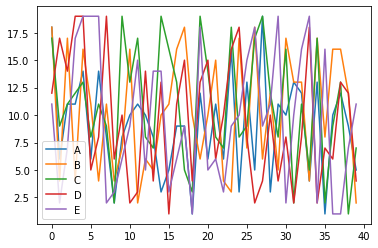

In [57]:
df.plot(kind = 'line')

<AxesSubplot:>

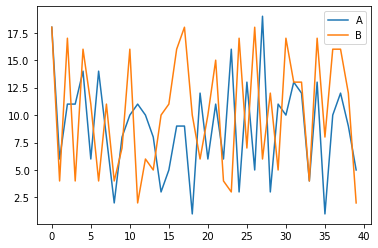

In [58]:
df[['A','B']].plot(kind = 'line')

##### Bar Plot

<AxesSubplot:>

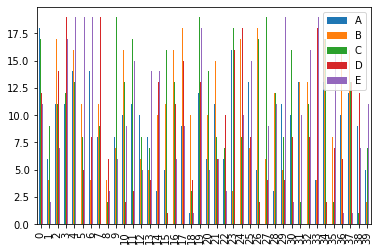

In [59]:
df.plot(kind = 'bar')

<AxesSubplot:>

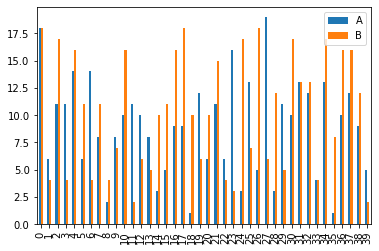

In [61]:
df[['A','B']].plot(kind = 'bar')

<AxesSubplot:>

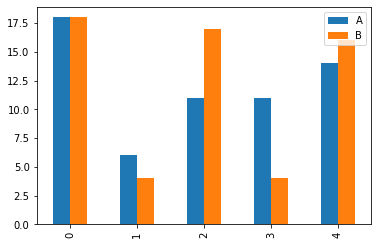

In [60]:
df[['A','B']].head().plot(kind = 'bar')

<AxesSubplot:>

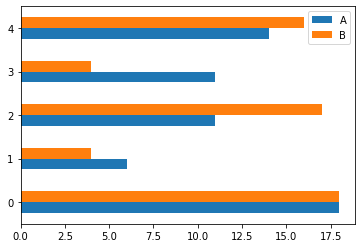

In [64]:
df[['A','B']].head().plot(kind = 'barh')

##### Area Plot

<AxesSubplot:>

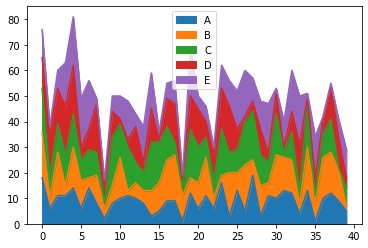

In [65]:
df.plot(kind = 'area')

<AxesSubplot:>

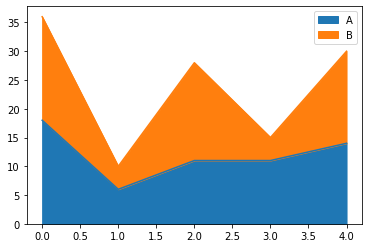

In [66]:
df[['A','B']].head().plot(kind = 'area')

##### Box Plot

<AxesSubplot:>

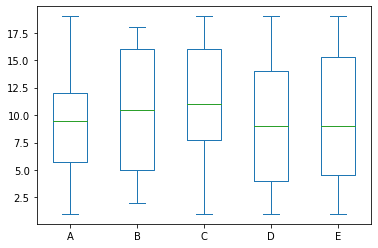

In [67]:
df.plot(kind = 'box')

##### Histogram

<AxesSubplot:ylabel='Frequency'>

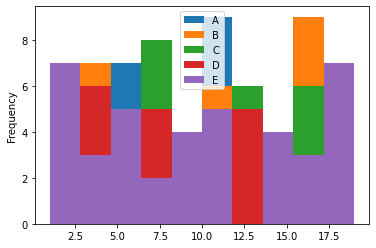

In [68]:
df.plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

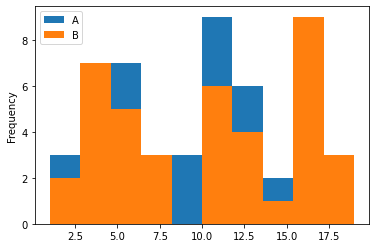

In [69]:
df[['A','B']].plot(kind = 'hist')

##### Kernel Density Estimation (KDE)

<AxesSubplot:ylabel='Density'>

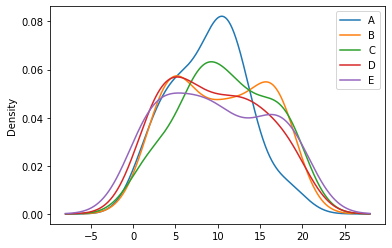

In [70]:
df.plot(kind = 'kde')

##### Scatter Plot

<AxesSubplot:xlabel='A', ylabel='B'>

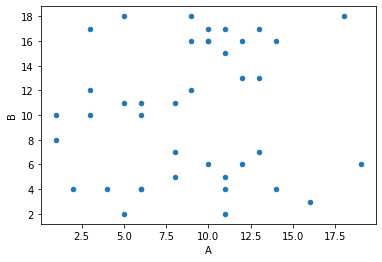

In [71]:
df.plot( x = 'A', y = 'B', kind = 'scatter')

## 33. Nilai Kumulatif pada Pandas Data Frame

##### Persiapan Data Frame

In [72]:
d = {'pemain' : ['Budi', ' Joni', 'Iman', 'Budi', 'Budi', 'Iman', 'Asep', 'Joni'],
     'goal' : [2, 1, 3, 1, 1, 2, 2, 3]}

df = pd.DataFrame(d)
df

,pemain,goal
0,Budi,2
1,Joni,1
2,Iman,3
3,Budi,1
4,Budi,1
5,Iman,2
6,Asep,2
7,Joni,3


##### Menampilkan nilai kumulatif (cummulative)

In [73]:
df['goal'].cumsum().to_frame()

,goal
0,2
1,3
2,6
3,7
4,8
5,10
6,12
7,15


In [75]:
df['jumlah_goal_kumulatif'] = df['goal'].cumsum()
df

,pemain,goal,jumlah_goal_kumulatif
0,Budi,2,2
1,Joni,1,3
2,Iman,3,6
3,Budi,1,7
4,Budi,1,8
5,Iman,2,10
6,Asep,2,12
7,Joni,3,15


In [76]:
df['jumlah_goal_kumulatif_tiap_pemain'] = df.groupby('pemain')['goal'].cumsum()
df

,pemain,goal,jumlah_goal_kumulatif,jumlah_goal_kumulatif_tiap_pemain
0,Budi,2,2,2
1,Joni,1,3,1
2,Iman,3,6,3
3,Budi,1,7,3
4,Budi,1,8,4
5,Iman,2,10,5
6,Asep,2,12,2
7,Joni,3,15,3


In [77]:
df['cummax'] = df['goal'].cummax()
df

,pemain,goal,jumlah_goal_kumulatif,jumlah_goal_kumulatif_tiap_pemain,cummax
0,Budi,2,2,2,2
1,Joni,1,3,1,2
2,Iman,3,6,3,3
3,Budi,1,7,3,3
4,Budi,1,8,4,3
5,Iman,2,10,5,3
6,Asep,2,12,2,3
7,Joni,3,15,3,3


In [78]:
df['cummin'] = df['goal'].cummin()
df

,pemain,goal,jumlah_goal_kumulatif,jumlah_goal_kumulatif_tiap_pemain,cummax,cummin
0,Budi,2,2,2,2,2
1,Joni,1,3,1,2,1
2,Iman,3,6,3,3,1
3,Budi,1,7,3,3,1
4,Budi,1,8,4,3,1
5,Iman,2,10,5,3,1
6,Asep,2,12,2,3,1
7,Joni,3,15,3,3,1


In [79]:
df['cumprod'] = df['goal'].cumprod() # perkalian kumulatif
df

,pemain,goal,jumlah_goal_kumulatif,jumlah_goal_kumulatif_tiap_pemain,cummax,cummin,cumprod
0,Budi,2,2,2,2,2,2
1,Joni,1,3,1,2,1,2
2,Iman,3,6,3,3,1,6
3,Budi,1,7,3,3,1,6
4,Budi,1,8,4,3,1,6
5,Iman,2,10,5,3,1,12
6,Asep,2,12,2,3,1,24
7,Joni,3,15,3,3,1,72


## 34. Mapping Data Frame dengan applymap

##### Persiapan Data Frame

In [89]:
df = pd.DataFrame({'jenis_kelamin' : ['Pria','Wanita','lelaki','Lelaki','perempuan'],
                  'usia' : [23, 21, 24, 22, 21],
                  'shift' : ['pagi', 'siang', 'malam', 'Siang', 'pagi']})
df

,jenis_kelamin,usia,shift
0,Pria,23,pagi
1,Wanita,21,siang
2,lelaki,24,malam
3,Lelaki,22,Siang
4,perempuan,21,pagi


##### Mapping pada Data Frame dengan `applymap()`

In [90]:
# jika type data str maka digunakan lowercase
df = df.applymap(lambda x: x.lower() if type(x) == str else x)
df

,jenis_kelamin,usia,shift
0,pria,23,pagi
1,wanita,21,siang
2,lelaki,24,malam
3,lelaki,22,siang
4,perempuan,21,pagi


##### `applymap()` dengan dictionary

In [93]:
mapping = {'pria' : 'L',
          'lelaki' : 'L',
          'wanita' : 'P',
          'perempuan' : 'P',
          'pagi' : 1,
          'siang' : 2,
          'malam' : 3 }

df.applymap(mapping.get)

,jenis_kelamin,usia,shift
0,L,None,1
1,P,None,2
2,L,None,3
3,L,None,2
4,P,None,1


In [94]:
df[['jenis_kelamin', 'shift']] = df[['jenis_kelamin', 'shift']].applymap(mapping.get)
df

,jenis_kelamin,usia,shift
0,L,23,1
1,P,21,2
2,L,24,3
3,L,22,2
4,P,21,1


## 35. Memadukan fungsi agregasi dengan transform

##### Persiapan Data Frame

In [105]:
d = {'no_nota' : [1, 1, 1, 2, 2, 3, 4, 5],
    'kopi' : ['latte', 'cappucino', 'espresso', 'latte', 'espresso', 'cappucino', 'latte', 'espresso'],
    'harga' : [50, 60, 80, 150, 120, 60, 180, 40]}

df = pd.DataFrame(d)
df

,no_nota,kopi,harga
0,1,latte,50
1,1,cappucino,60
2,1,espresso,80
3,2,latte,150
4,2,espresso,120
5,3,cappucino,60
6,4,latte,180
7,5,espresso,40


##### Menghitung total harga untuk tiap nomor nota

In [106]:
df.groupby('no_nota')['harga'].sum().to_frame()

,harga
no_nota,
1,190
2,270
3,60
4,180
5,40


In [109]:
# membuat kolom baru total_harga
df['total_harga'] = df.groupby('no_nota')['harga'].transform(sum)
df

,no_nota,kopi,harga,total_harga
0,1,latte,50,190
1,1,cappucino,60,190
2,1,espresso,80,190
3,2,latte,150,270
4,2,espresso,120,270
5,3,cappucino,60,60
6,4,latte,180,180
7,5,espresso,40,40


##### Menghitung total omset untuk tiap jenjis kopi yang terjual

In [111]:
df.groupby('kopi')['harga'].sum().to_frame()

,harga
kopi,
cappucino,120
espresso,240
latte,380


In [113]:
df['total_omset'] = df.groupby('kopi')['harga'].transform(sum)
df

,no_nota,kopi,harga,total_harga,total_omset
0,1,latte,50,190,380
1,1,cappucino,60,190,120
2,1,espresso,80,190,240
3,2,latte,150,270,380
4,2,espresso,120,270,240
5,3,cappucino,60,60,120
6,4,latte,180,180,380
7,5,espresso,40,40,240


## 36. Menyatukan kolom pada Pandas Data Frame

##### Persiapan Data Frame

In [95]:
data = {'nama' : ['bayu', ' indra', 'devi', 'agni'],
       'jenis_kelamin' : ['L', 'L', 'P', 'P'],
       'usia' : [23, 21, 22, 25]}

df = pd.DataFrame(data)
df

,nama,jenis_kelamin,usia
0,bayu,L,23
1,indra,L,21
2,devi,P,22
3,agni,P,25


##### Menyatukan kolom dengan `str.cat()`

In [96]:
df['nama'].str.cat(df['jenis_kelamin'], sep = ', ').to_frame()

,nama
0,"bayu, L"
1,"indra, L"
2,"devi, P"
3,"agni, P"


In [98]:
df['nama_jk'] = df['nama'].str.cat(df['jenis_kelamin'], sep = ', ')
df

,nama,jenis_kelamin,usia,nama_jk
0,bayu,L,23,"bayu, L"
1,indra,L,21,"indra, L"
2,devi,P,22,"devi, P"
3,agni,P,25,"agni, P"


In [101]:
# satu tipe data -> str
df['nama'].str.cat(df['usia'].astype('str'), sep = ' - ').to_frame()

,nama
0,bayu - 23
1,indra - 21
2,devi - 22
3,agni - 25


In [103]:
df['nama_usia'] = df['nama'].str.cat(df['usia'].astype('str'), sep = ' - ')
df

,nama,jenis_kelamin,usia,nama_jk,nama_usia
0,bayu,L,23,"bayu, L",bayu - 23
1,indra,L,21,"indra, L",indra - 21
2,devi,P,22,"devi, P",devi - 22
3,agni,P,25,"agni, P",agni - 25
